In [1]:

from skimage import io
from skimage.registration import phase_cross_correlation
from scipy.ndimage import fourier_shift
from aicsimageio import AICSImage
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import czifile
import xml.etree.ElementTree as ET
from datetime import datetime, timezone
import pandas as pd
from datetime import datetime, timezone, timedelta
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry

def int_to_float(out):
    """
    Convert image data from integer to float format.

    Parameters:
    - out (np.ndarray): Input image data in integer format.

    Returns:
    - np.ndarray: Converted image data in float format.
    
    Note:
    If the input data type is 'uint16', the conversion is normalized to the range [0, 1]
    by dividing by ((2**16) - 1). If the input data type is 'uint8', the normalization
    is performed by dividing by ((2**8) - 1), resulting in the range [0, 1].
    """
    if out.dtype=='uint16':
        return out.astype(float)/((2**16)-1)
    elif out.dtype=='uint8':
        return out.astype(float)/((2**8)-1)
    

def load_image(path):
    img = AICSImage(path)
    reshaped_img = img.data.reshape(85, 1536, 1536)
    return int_to_float(reshaped_img)

In [108]:
x = load_image('../../../Downloads/Y622_1.czi')

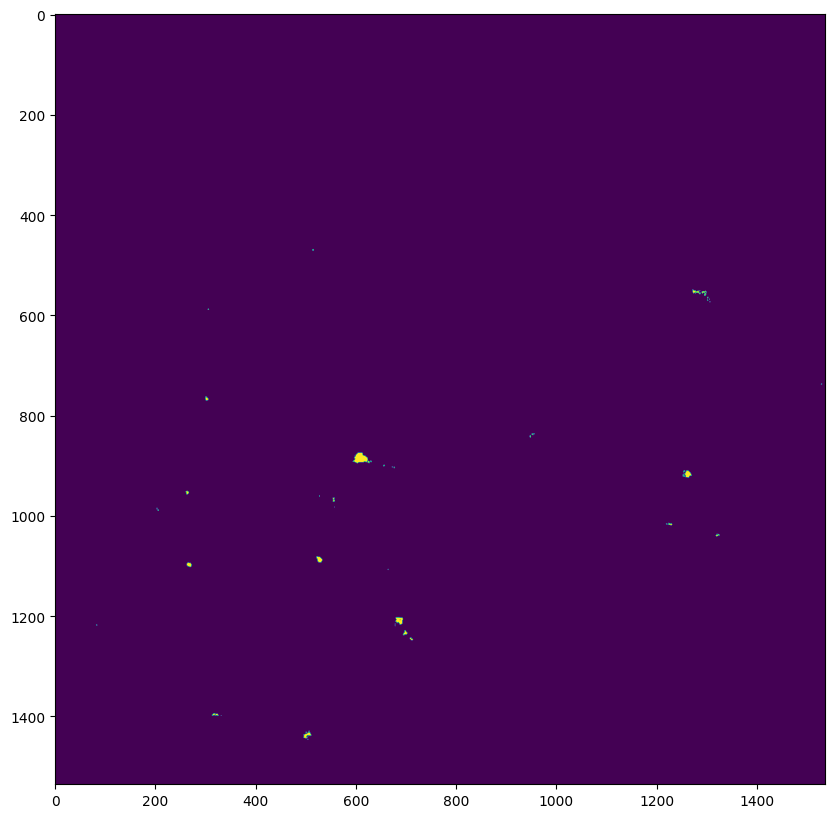

In [113]:
plt.figure(figsize=(10, 10))
T = x[13]>np.percentile(x[20], 99.9)
from scipy.ndimage import median_filter
T = median_filter(T, size=3)

plt.imshow(T)

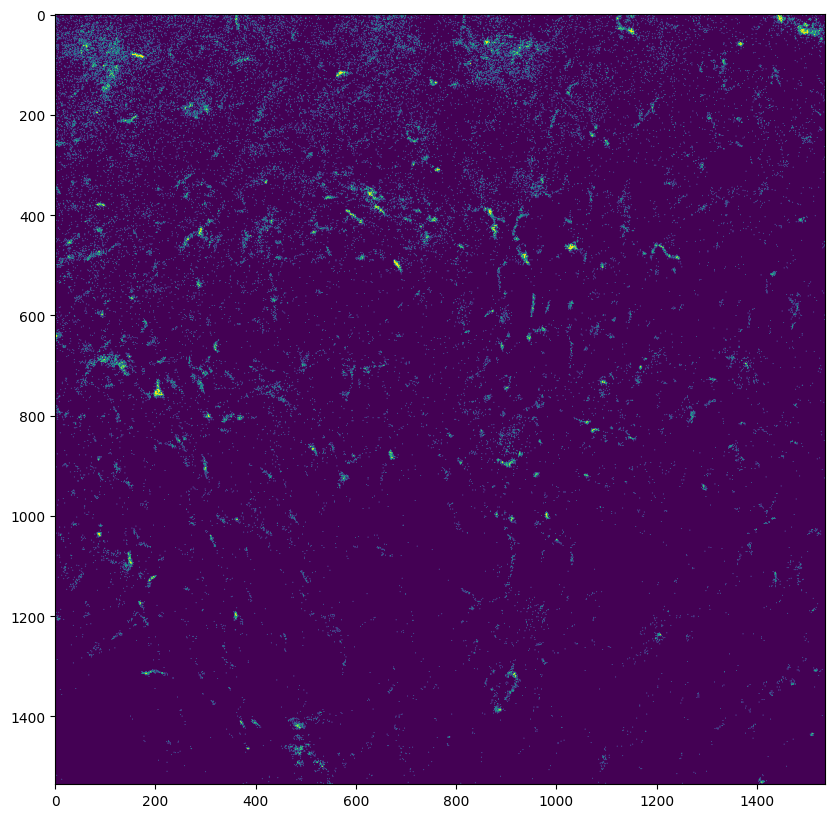

In [85]:
plt.figure(figsize=(10, 10))
T = x[20]>np.percentile(x[20], 98)
from scipy.ndimage import median_filter
#T = median_filter(T, size=)

plt.imshow(T)

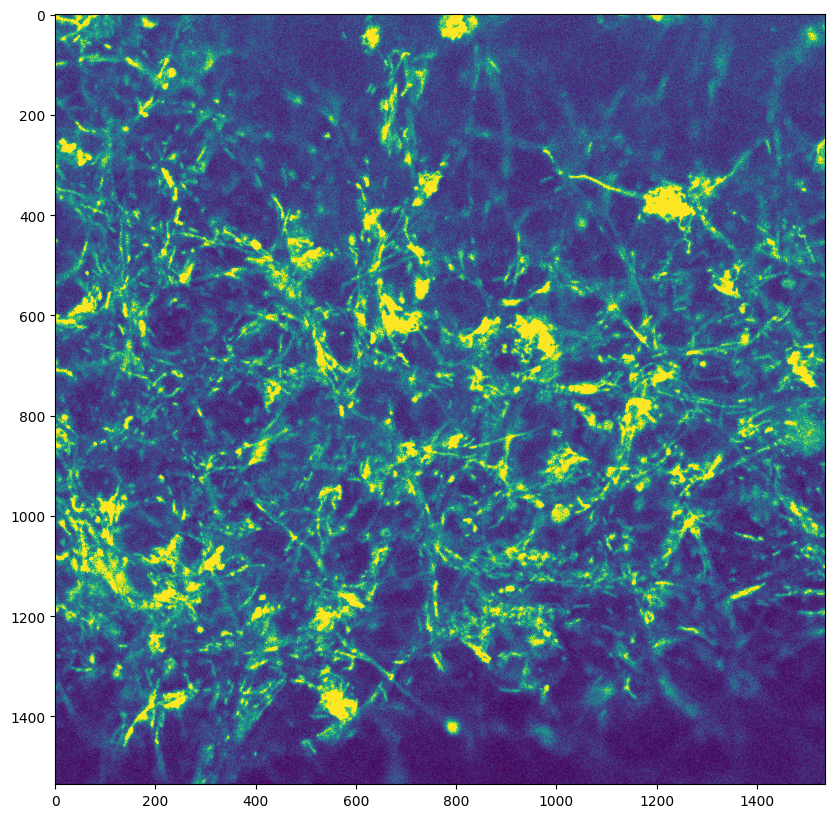

In [78]:
plt.figure(figsize=(10, 10))
plt.imshow(x[20], vmax=.5)

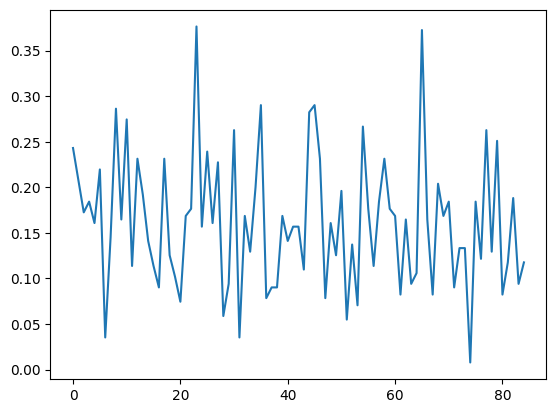

In [83]:
plt.plot([x[i][9][0] for i in range(x.shape[0])])

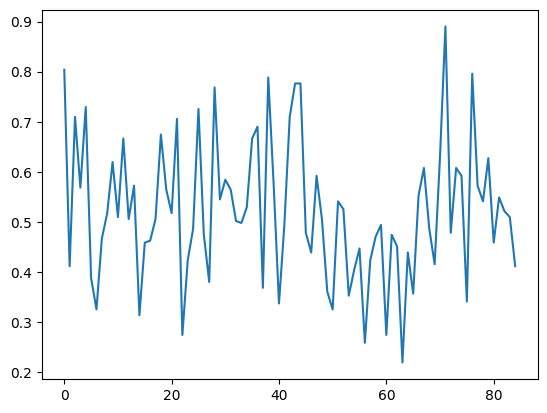

In [80]:
plt.plot([x[i][9][0] for i in range(x.shape[0])])

In [19]:
# Reshape the image into a 2D array where each row is a pixel
pixels = np.vstack([x[i].ravel() for i in range(x.shape[0])])

# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pixels_pca = pca.fit_transform(pixels)

# # Reshape back to image dimensions
# pca_image = pixels_pca.reshape(x[0].shape)


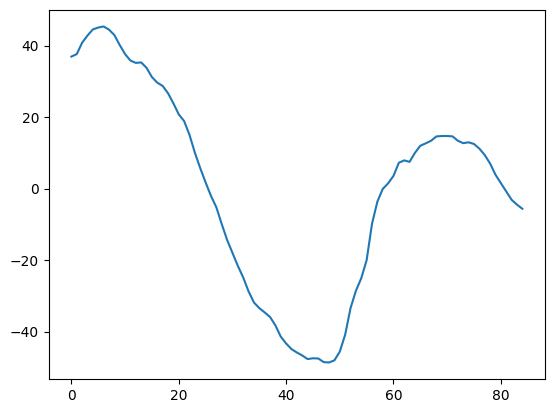

In [30]:
plt.plot(pixels_pca[:,1])

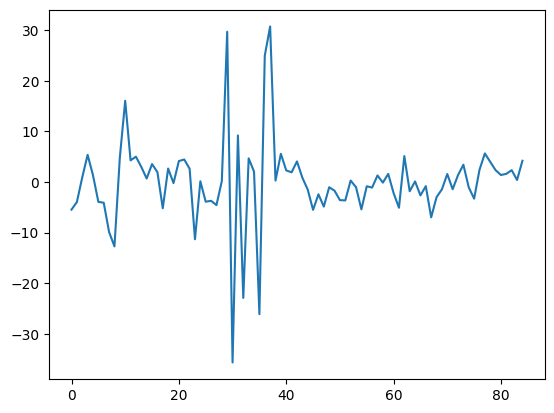

In [17]:
plt.plot(pixels_pca[:,7])

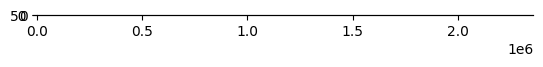

In [111]:
plt.imshow(d)

In [82]:
pixels_pca.shape

(1536, 2)

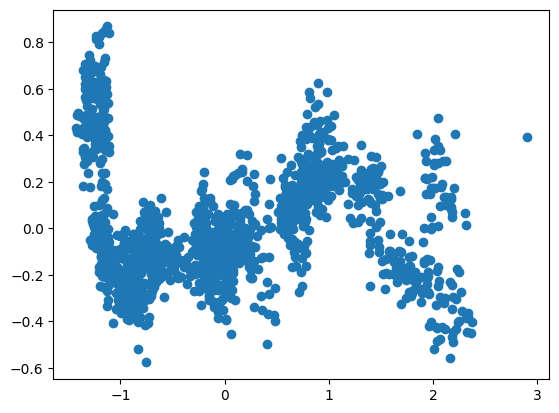

In [84]:
plt.scatter(pixels_pca[:,0], pixels_pca[:,1])

In [ ]:

# Plot explained variance ratio
plt.figure(figsize=(8,4))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')

# Show first principal component
plt.figure(figsize=(8,8))
plt.imshow(pca_image[:,:,0], cmap='gray')
plt.title('First Principal Component')
plt.colorbar()

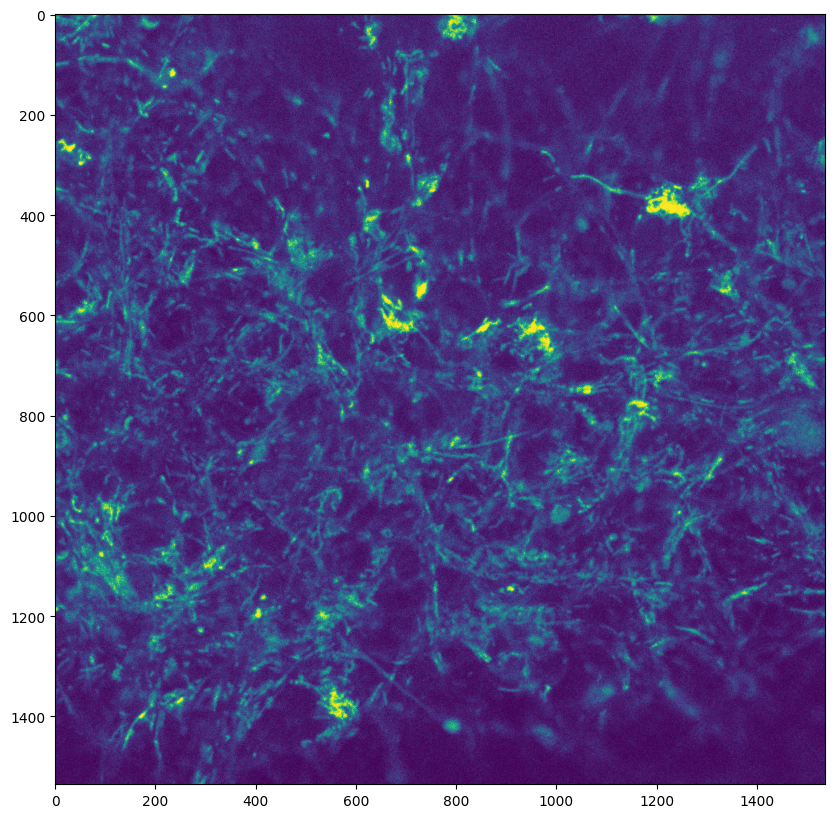

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(x[7])